In [15]:
# Importing required libraries 
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np
import random  # Import for generating random index

In [16]:
# Loading and preprocessing the image data 
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
input_shape = (28, 28, 1)

In [17]:
# Reshape the dataset and convert to float for normalization
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255.0

MemoryError: Unable to allocate 179. MiB for an array with shape (60000, 28, 28, 1) and data type float32

In [18]:
print("Shape of Training : ", x_train.shape)
print("Shape of Testing : ", x_test.shape)

Shape of Training :  (60000, 28, 28)
Shape of Testing :  (10000, 28, 28)


In [61]:
# Defining the model architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))
model.summary();

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 2304)              0         
                                                                 
 dense_13 (Dense)            (None, 64)               

In [62]:
# Training the model 
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=2)

Epoch 1/2


ValueError: in user code:

    File "C:\Users\user\anaconda\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\user\anaconda\Lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\user\anaconda\Lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\user\anaconda\Lib\site-packages\keras\src\engine\training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\user\anaconda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\user\anaconda\Lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_6" is incompatible with the layer: expected shape=(None, 32, 32, 3), found shape=(32, 28, 28, 1)


In [52]:
# Estimating model performance
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

313/313 [==============================] - 2s 4ms/step - loss: 0.0581 - accuracy: 0.9813
Test Loss: 0.058118321001529694
Test Accuracy: 0.9812999963760376


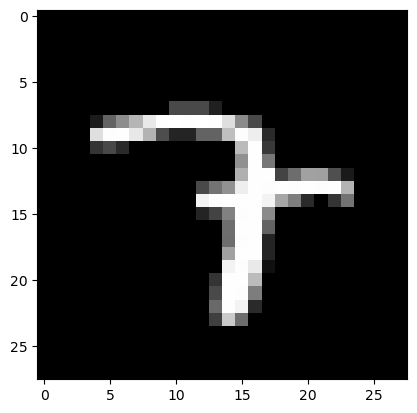

In [55]:
# Showing an image from dataset
n = random.randint(0, x_train.shape[0] - 1)
image = x_train[n]
plt.imshow(np.squeeze(image), cmap='gray')
plt.show()

In [56]:
# Reshape the image for model input
image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])

# Predicting the class of the image
predict_model = model.predict(image)

# Display the predicted class
print("Predicted class: {}".format(np.argmax(predict_model)))

1/1 [==============================] - 0s 40ms/step
Predicted class: 7
